In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
plt.rcParams['figure.facecolor'] = 'white'

# Class 4: Managing Data with Pandas 

Pandas is a Python library for managing datasets. Documentation and examples are available on the website for Pandas: http://pandas.pydata.org/. 

In this Notebook, we'll make use of a dataset containing long-run averages of inflation, money growth, and real GDP. The dataset is available here: https://raw.githubusercontent.com/letsgoexploring/economic-data/master/quantity-theory/csv/quantity_theory_data.csv (Python code to generate the dataset: https://github.com/letsgoexploring/economic-data). Recall that the quantity theory of money implies the following linear relationship between the long-run rate of money growth, the long-run rate of inflation, and the long-run rate of real GDP growth in a country:

\begin{align}
\text{inflation} & = \text{money growth} - \text{real GDP growth},
\end{align}

Generally, we treat real GDP growth and money supply growth as exogenous so this is a theory about the determination of inflation.

### Import Pandas

In [2]:
# Import the Pandas module as pd
import pandas as pd

### Import data from a csv file

Pandas has a function called `read_csv()` for reading data from a csv file into a Pandas `DataFrame` object.

In [3]:
# Import quantity theory data into a Pandas DataFrame called 'df' with country names as the index.

# Directly from internet
df = pd.read_csv('https://raw.githubusercontent.com/letsgoexploring/economic-data/master/quantity-theory/csv/quantity_theory_data.csv')

# From current working directory
# df = pd.read_csv('quantity_theort_data.csv')

In [4]:
# Print the first 5 rows
print(df.head())

               country iso code  observations  money growth  inflation  \
0          Afghanistan      AFG          15.0      0.150122   0.050741   
1              Albania      ALB          29.0      0.119258   0.045885   
2              Algeria      DZA          59.0      0.157423   0.100184   
3               Angola      AGO          28.0      0.713743   0.666618   
4  Antigua and Barbuda      ATG          46.0      0.085994   0.039780   

   gdp growth income group oecd  
0    0.058126          low   no  
1    0.044905       middle   no  
2    0.035556       middle   no  
3    0.049026       middle   no  
4    0.032215         high   no  


In [5]:
# Print the last 10 rows
print(df.tail(10))

                country iso code  observations  money growth  inflation  \
154      United Kingdom      GBR          63.0      0.101203   0.052117   
155       United States      USA          62.0      0.075239   0.032954   
156             Uruguay      URY          63.0      0.375600   0.332810   
157          Uzbekistan      UZB          10.0      0.229750   0.150084   
158             Vanuatu      VUT          44.0      0.069920   0.042045   
159            Viet Nam      VNM          28.0      0.228746   0.078736   
160  West Bank and Gaza      PSE          25.0      0.083618   0.032677   
161         Yemen, Rep.      YEM          24.0      0.178001   0.147702   
162              Zambia      ZMB          30.0      0.249750   0.168449   
163            Zimbabwe      ZWE          27.0      0.053944  -0.009568   

     gdp growth income group oecd  
154    0.023045         high  yes  
155    0.029634         high  yes  
156    0.021391         high   no  
157    0.056937       middle  

In [6]:
# Print the type of variable 'df'
print(type(df))

<class 'pandas.core.frame.DataFrame'>


### Properties of `DataFrame` objects

Like entries in a spreadsheet file, elements in a `DataFrame` object have row (or *index*) and column coordinates. Column names are always strings. Index elements can be integers, strings, or dates.

In [7]:
# Print the columns of df
print(df.columns)

Index(['country', 'iso code', 'observations', 'money growth', 'inflation',
       'gdp growth', 'income group', 'oecd'],
      dtype='object')


In [8]:
# Create a new variable called 'money' equal to the 'money growth' column and print
money = df['money growth']
print(money)

0      0.150122
1      0.119258
2      0.157423
3      0.713743
4      0.085994
         ...   
159    0.228746
160    0.083618
161    0.178001
162    0.249750
163    0.053944
Name: money growth, Length: 164, dtype: float64


In [9]:
# Print the type of the variable money
print(type(money))

<class 'pandas.core.series.Series'>


A Pandas `Series` stores one column of data. Like a `DataFrame`, a `Series` object has an index. Note that `money` has the same index as `df`. Instead of having a column, the `Series` has a `name` attribute.

In [10]:
# Print the name of the 'money' variable
print(money.name)

money growth


Select multiple columns of a `DataFrame` by puting the desired column names in a set a of square brackets (i.e., in a `list`).

In [11]:
# Print the first 5 rows of just the inflation, money growth, and gdp growth columns
print(df[['inflation','money growth','gdp growth']].head())

   inflation  money growth  gdp growth
0   0.050741      0.150122    0.058126
1   0.045885      0.119258    0.044905
2   0.100184      0.157423    0.035556
3   0.666618      0.713743    0.049026
4   0.039780      0.085994    0.032215


As mentioned, the set of row coordinates is the index. Unless specified otherwise, Pandas automatically assigns an integer index starting at 0 to rows of the `DataFrame`.

In [12]:
# Print the index of 'df'
print(df.index)

RangeIndex(start=0, stop=164, step=1)


Note that in the index of the `df` is the numbers 0 through 177. We could have specified a different index when we imported the data using `read_csv()`. For example, suppose we want to the country names to be the index of `df`. Since country names are in the first column of the data file, we can pass the argument `index_col=0` to `read_csv()`

In [13]:
# Import quantity theory data into a Pandas DataFrame called 'df' with country names as the index.
df = pd.read_csv('https://raw.githubusercontent.com/letsgoexploring/economic-data/master/quantity-theory/csv/quantity_theory_data.csv',index_col=0)

# Print first 5 rows of df
print(df.head())

                    iso code  observations  money growth  inflation  \
country                                                               
Afghanistan              AFG          15.0      0.150122   0.050741   
Albania                  ALB          29.0      0.119258   0.045885   
Algeria                  DZA          59.0      0.157423   0.100184   
Angola                   AGO          28.0      0.713743   0.666618   
Antigua and Barbuda      ATG          46.0      0.085994   0.039780   

                     gdp growth income group oecd  
country                                            
Afghanistan            0.058126          low   no  
Albania                0.044905       middle   no  
Algeria                0.035556       middle   no  
Angola                 0.049026       middle   no  
Antigua and Barbuda    0.032215         high   no  


Use the `loc` attribute to select rows of the `DataFrame` by index *values*.

In [14]:
# Create a new variable called 'usa_row' equal to the 'United States' row and print
usa_row = df.loc['United States']
print(usa_row)

iso code             USA
observations        62.0
money growth    0.075239
inflation       0.032954
gdp growth      0.029634
income group        high
oecd                 yes
Name: United States, dtype: object


Use `iloc` attribute to select row based on integer location (starting from 0).

In [15]:
# Create a new variable called 'third_row' equal to the third row in the DataFrame and print
third_row = df.iloc[2]
print(third_row)

iso code             DZA
observations        59.0
money growth    0.157423
inflation       0.100184
gdp growth      0.035556
income group      middle
oecd                  no
Name: Algeria, dtype: object


There are several ways to return a single element of a Pandas `DataFrame`. For example, here are three that we want to return the value of inflation for the United States from the DataFrame `df`:

1. `df.loc['United States','inflation']`
2. `df.loc['United States']['inflation']`
3. `df['inflation']['United States']`

The first method points directly to the element in the `df` while the second and third methods return *copies* of the element. That means that you can modify the value of inflation for the United States by running:

    df.loc['United States','inflation'] = new_value
    
But running either:

    df.loc['United States']['inflation'] = new_value
    
or:

    df['inflation']['United States'] = new_value

will return a warning from Pandas.

In [16]:
# Print the inflation rate of the United States  (By index and column together)
print('Long-run average inflation in US: ',df.loc['United States','inflation'])

Long-run average inflation in US:  0.032954109586553


In [17]:
# Print the inflation rate of the United States (first by index, then by column)
print('Long-run average inflation in US: ',df.loc['United States']['inflation'])

Long-run average inflation in US:  0.032954109586553


In [18]:
# Print the inflation rate of the United States  (first by column, then by index)
print('Long-run average inflation in US: ',df['inflation']['United States'])

Long-run average inflation in US:  0.032954109586553


New columns are easily created as functions of existing columns.

In [19]:
# Create a new column called 'difference' equal to the money growth column minus 
# the inflation column and print the modified DataFrame
df['difference'] = df['money growth'] - df['inflation']
print(df['difference'])

country
Afghanistan            0.099381
Albania                0.073373
Algeria                0.057240
Angola                 0.047125
Antigua and Barbuda    0.046214
                         ...   
Viet Nam               0.150010
West Bank and Gaza     0.050941
Yemen, Rep.            0.030299
Zambia                 0.081301
Zimbabwe               0.063513
Name: difference, Length: 164, dtype: float64


In [20]:
# Print the average difference between money growth and inflation
print(df.difference.mean())

0.06498290472561423


In [21]:
# Remove the following columns from the DataFrame: 'iso code','observations','difference'
df = df.drop(['iso code','observations','difference'],axis=1)

# Print the modified DataFrame
print(df)

                     money growth  inflation  gdp growth income group oecd
country                                                                   
Afghanistan              0.150122   0.050741    0.058126          low   no
Albania                  0.119258   0.045885    0.044905       middle   no
Algeria                  0.157423   0.100184    0.035556       middle   no
Angola                   0.713743   0.666618    0.049026       middle   no
Antigua and Barbuda      0.085994   0.039780    0.032215         high   no
...                           ...        ...         ...          ...  ...
Viet Nam                 0.228746   0.078736    0.064233       middle   no
West Bank and Gaza       0.083618   0.032677    0.032840       middle   no
Yemen, Rep.              0.178001   0.147702    0.040082          low   no
Zambia                   0.249750   0.168449    0.045643       middle   no
Zimbabwe                 0.053944  -0.009568    0.013777       middle   no

[164 rows x 5 columns]


### Methods

A Pandas `DataFrame` has a bunch of useful methods defined for it. `describe()` returns some summary statistics.

In [22]:
# Print the summary statistics for 'df'
print(df.describe())

       money growth   inflation  gdp growth
count    164.000000  164.000000  164.000000
mean       0.183883    0.118900    0.037290
std        0.150979    0.153796    0.016797
min        0.043854   -0.009568   -0.020226
25%        0.104276    0.044244    0.026611
50%        0.140879    0.070278    0.036249
75%        0.198570    0.119320    0.045496
max        1.247697    1.277045    0.118370


The `corr()` method returns a `DataFrame` containing the correlation coefficients of the specified `DataFrame`.

In [23]:
# Create a variable called 'correlations' containg the correlation coefficients for columns in 'df'
correlations = df.corr(numeric_only=True)

# Print the correlation coefficients
print(correlations)

              money growth  inflation  gdp growth
money growth      1.000000   0.976830   -0.038053
inflation         0.976830   1.000000   -0.184002
gdp growth       -0.038053  -0.184002    1.000000


In [24]:
# Print the correlation coefficient for inflation and money growth
print('corr of inflation and money growth: ',round(correlations.loc['inflation','money growth'],4))

# Print the correlation coefficient for inflation and real GDP growth
print('corr of inflation and gdp growth:   ',round(correlations.loc['inflation','gdp growth'],4))

# Print the correlation coefficient for money growth and real GDP growth
print('corr of money growth and gdp growth:',round(correlations.loc['money growth','gdp growth'],4))

corr of inflation and money growth:  0.9768
corr of inflation and gdp growth:    -0.184
corr of money growth and gdp growth: -0.0381


`sort_values()` returns a copy of the original `DataFrame` sorted along the given column. The optional argument `ascending` is set to `True` by default, but can be changed to `False` if you want to print the lowest first.

In [25]:
# Print rows for the countries with the 10 lowest inflation rates
print(df.sort_values('inflation').head(10))

                       money growth  inflation  gdp growth income group oecd
country                                                                     
Zimbabwe                   0.053944  -0.009568    0.013777       middle   no
Djibouti                   0.087829   0.010197    0.051438       middle   no
Switzerland                0.055312   0.015822    0.017625         high  yes
Hong Kong SAR, China       0.079369   0.016239    0.029651         high   no
Micronesia, Fed. Sts.      0.044245   0.023068    0.000486       middle   no
Kosovo                     0.094805   0.023796    0.043597       middle   no
Singapore                  0.114496   0.024029    0.068731         high   no
Kuwait                     0.068904   0.024194    0.038129         high   no
Japan                      0.088954   0.024632    0.033605         high  yes
Israel                     0.084525   0.025285    0.039490         high  yes


In [26]:
# Print rows for the countries with the 10 highest inflation rates
print(df.sort_values('inflation',ascending=False).head(10))

                  money growth  inflation  gdp growth income group oecd
country                                                                
Congo, Dem. Rep.      1.247697   1.277045   -0.002394          low   no
Brazil                0.853755   0.740966    0.037985       middle   no
Argentina             0.743931   0.694377    0.022478       middle   no
Angola                0.713743   0.666618    0.049026       middle   no
Nicaragua             0.604314   0.534661    0.025918       middle   no
Ukraine               0.467406   0.499645   -0.020226       middle   no
Belarus               0.517935   0.474125    0.038857       middle   no
Peru                  0.493277   0.414915    0.034463       middle   no
Azerbaijan            0.397668   0.347086    0.044049       middle   no
Armenia               0.385788   0.334758    0.053237       middle   no


Note that `sort_values` and `sort_index` return *copies* of the original `DataFrame`. If, in the previous example, we had wanted to actually modify `df`, we would have need to explicitly overwrite it:

    df = df.sort_index(ascending=False)

In [27]:
# Print first 10 rows with the index sorted in descending alphabetical order
print(df.sort_index(ascending=False).head(10))

                    money growth  inflation  gdp growth income group oecd
country                                                                  
Zimbabwe                0.053944  -0.009568    0.013777       middle   no
Zambia                  0.249750   0.168449    0.045643       middle   no
Yemen, Rep.             0.178001   0.147702    0.040082          low   no
West Bank and Gaza      0.083618   0.032677    0.032840       middle   no
Viet Nam                0.228746   0.078736    0.064233       middle   no
Vanuatu                 0.069920   0.042045    0.021798       middle   no
Uzbekistan              0.229750   0.150084    0.056937       middle   no
Uruguay                 0.375600   0.332810    0.021391         high   no
United States           0.075239   0.032954    0.029634         high  yes
United Kingdom          0.101203   0.052117    0.023045         high  yes


### Quick plotting example

Construct a graph that visually confirms the quantity theory of money by making a scatter plot with average money growth on the horizontal axis and average inflation on the vertical axis. Set the marker size `s` to 50 and opacity (`alpha`) 0.25. Add a 45 degree line, axis labels, and a title. Lower and upper limits for the horizontal and vertical axes should be -0.2 and 1.2.

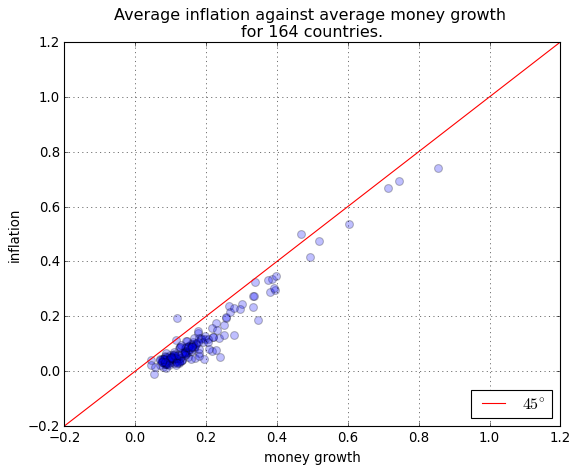

In [28]:
# Create data for 45 degree line
x45 = [-0.2,1.2]
y45 = [-0.2,1.2]

# Create figure and axis
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# Plot 45 degree line and create legend in lower right corner
ax.plot(x45,y45,'-r',label = '$45^{\circ}$')
ax.legend(loc='lower right')

# Scatter plot of data inflation against money growth
ax.scatter(df['money growth'],df['inflation'],s=50,alpha = 0.25)
ax.set_xlim([-0.2,1.2])
ax.set_ylim([-0.2,1.2])
ax.set_xlabel('money growth')
ax.set_ylabel('inflation')
ax.set_title('Average inflation against average money growth \nfor '+str(len(df.index))+' countries.')
ax.grid()

### Exporting a `DataFrame` to csv

Use the DataFrame method `to_csv()` to export DataFrame to a csv file.

In [29]:
# Export the DataFrame 'df' to a csv file called 'modified_data.csv'.
df.to_csv('modified_data.csv')